In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs


# Data Preprocessing:
   ###   1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
   ###   2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
   ###   3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [121]:
df = pd.read_excel(r"C:\Users\chand\OneDrive\Desktop\Clustering\Clustering\EastWestAirlines.xlsx", sheet_name = 1)

In [122]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [123]:
df.nunique()

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

In [124]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [125]:
df.isnull().sum()


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [126]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [127]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

### Histograms

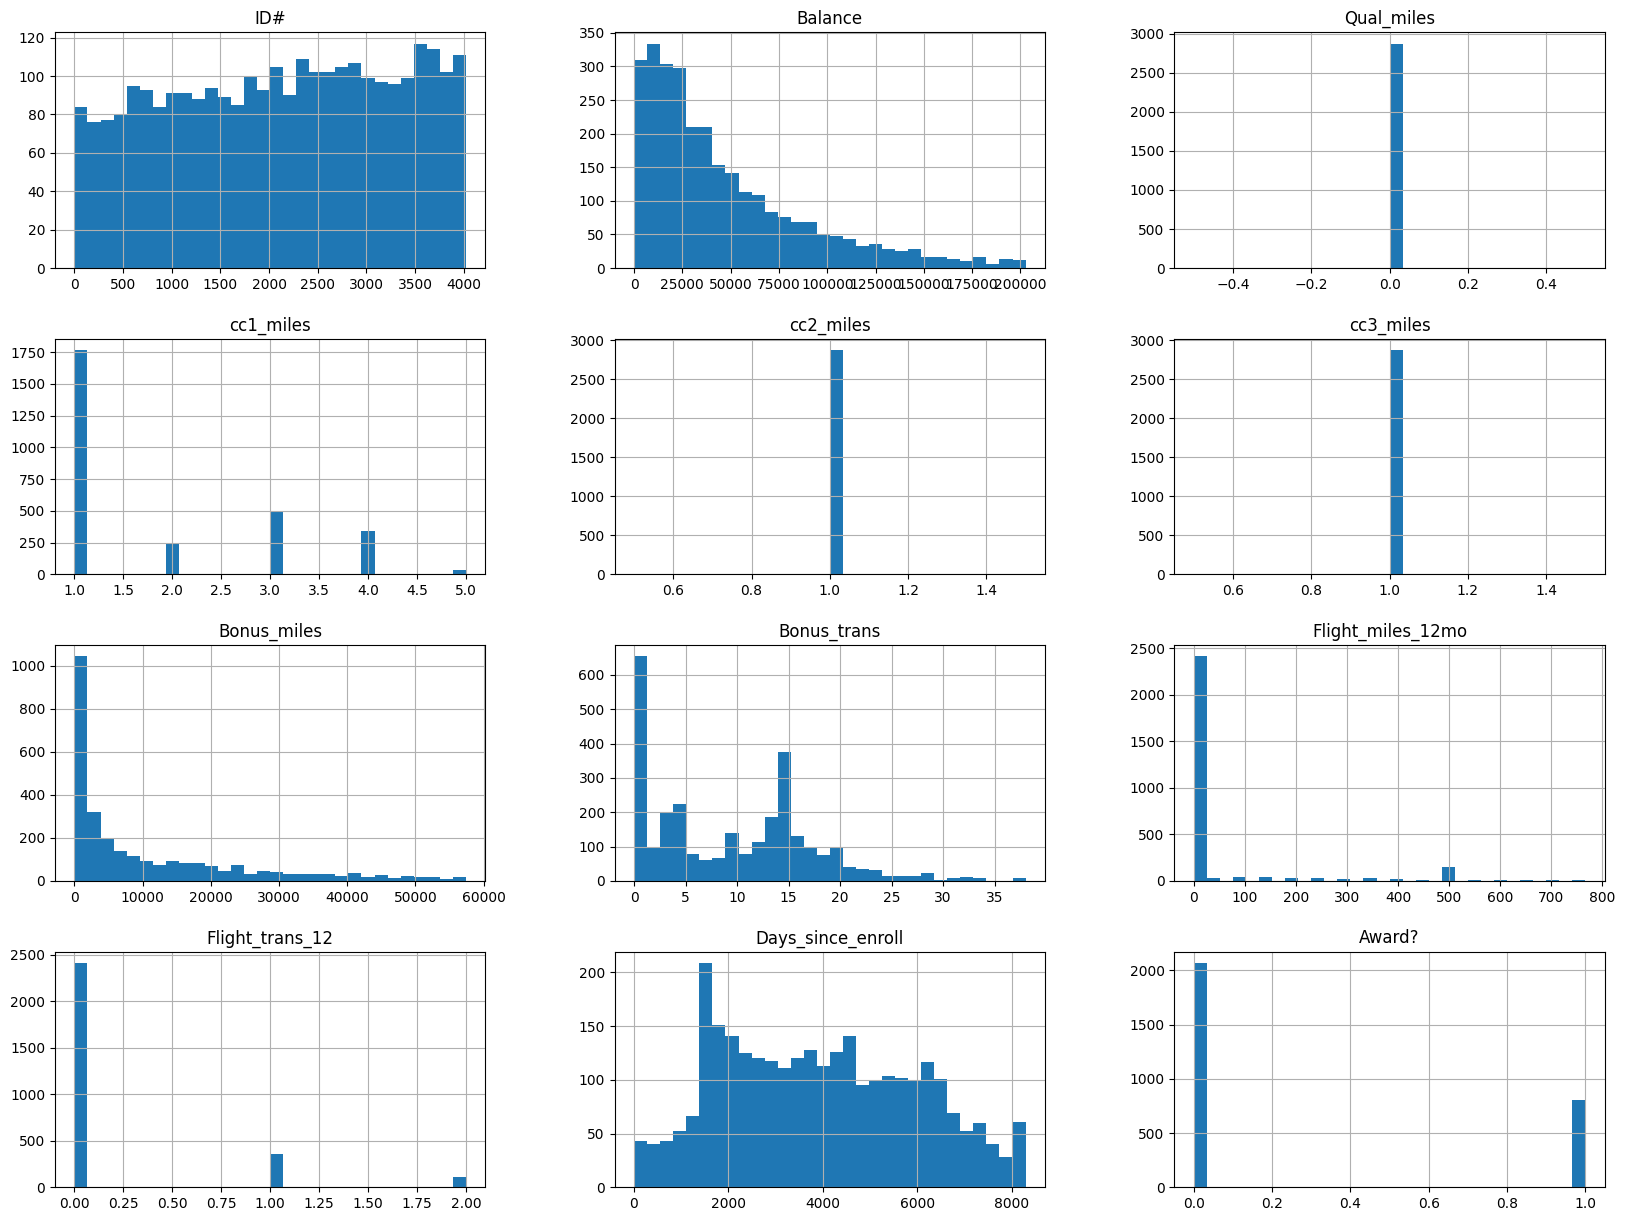

In [128]:
df.hist(bins=30, figsize=(20, 15))
plt.show()


### Boxplots

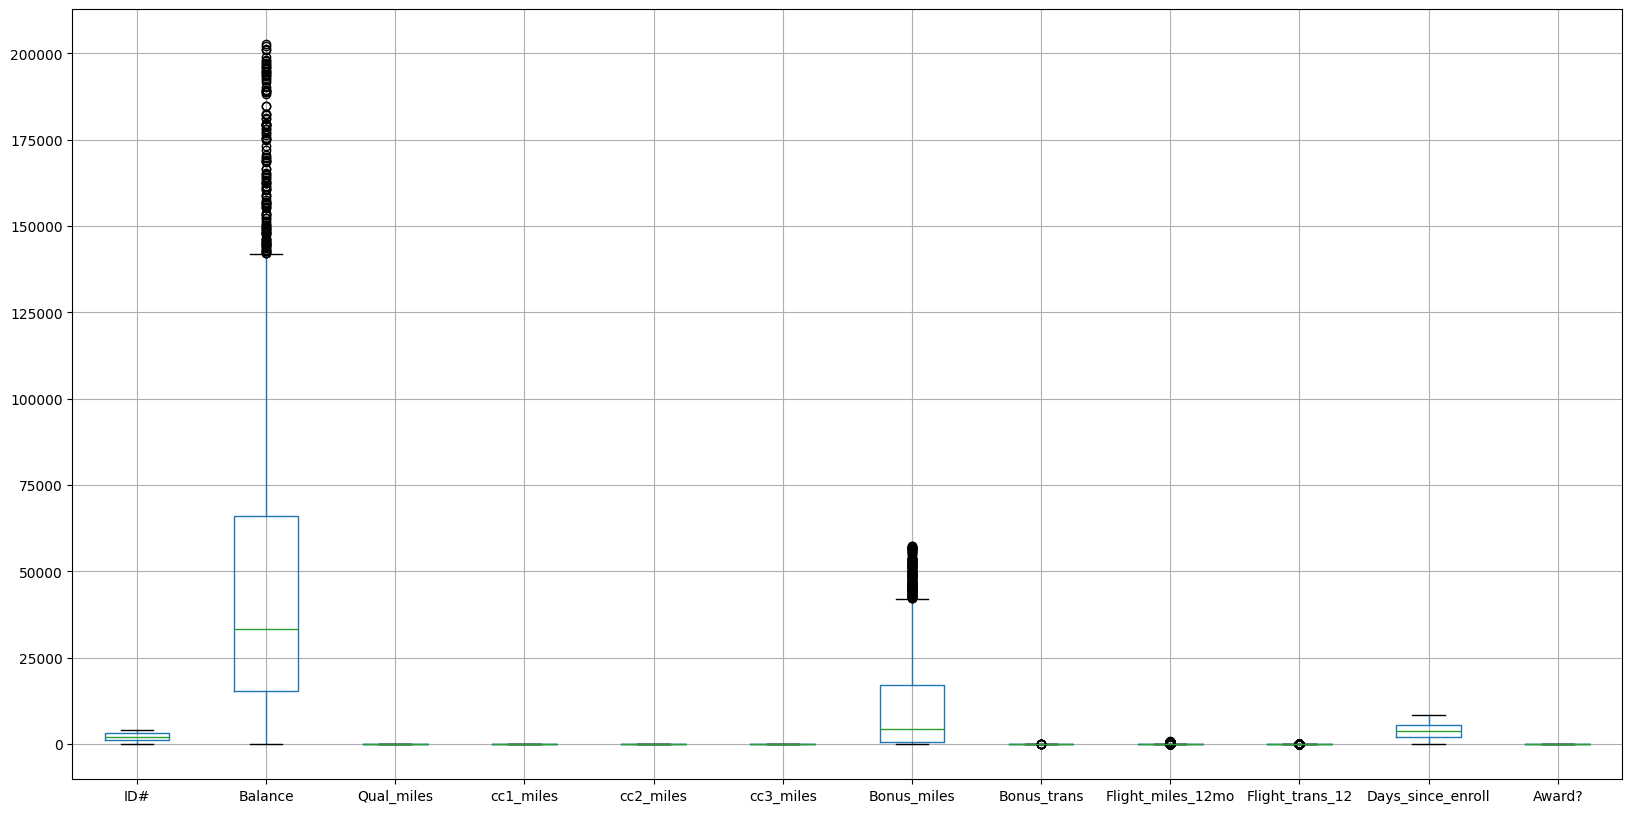

In [129]:
df.boxplot(figsize=(20, 10))
plt.show()


### Correlation Heatmap

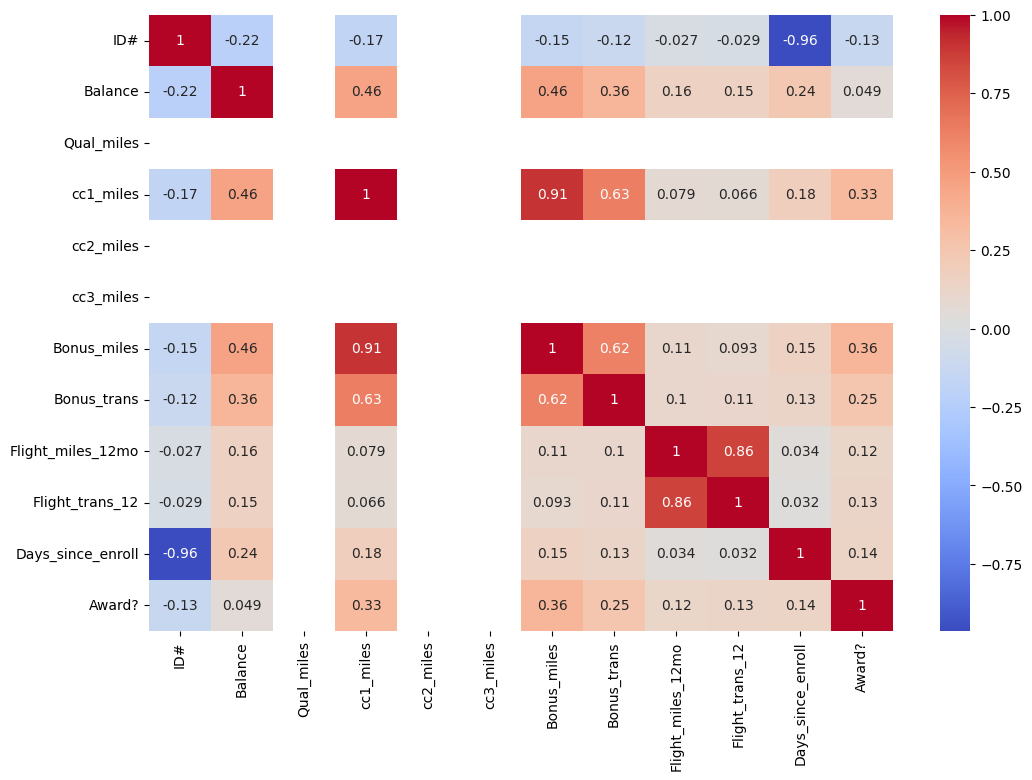

In [130]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


### Pairplot

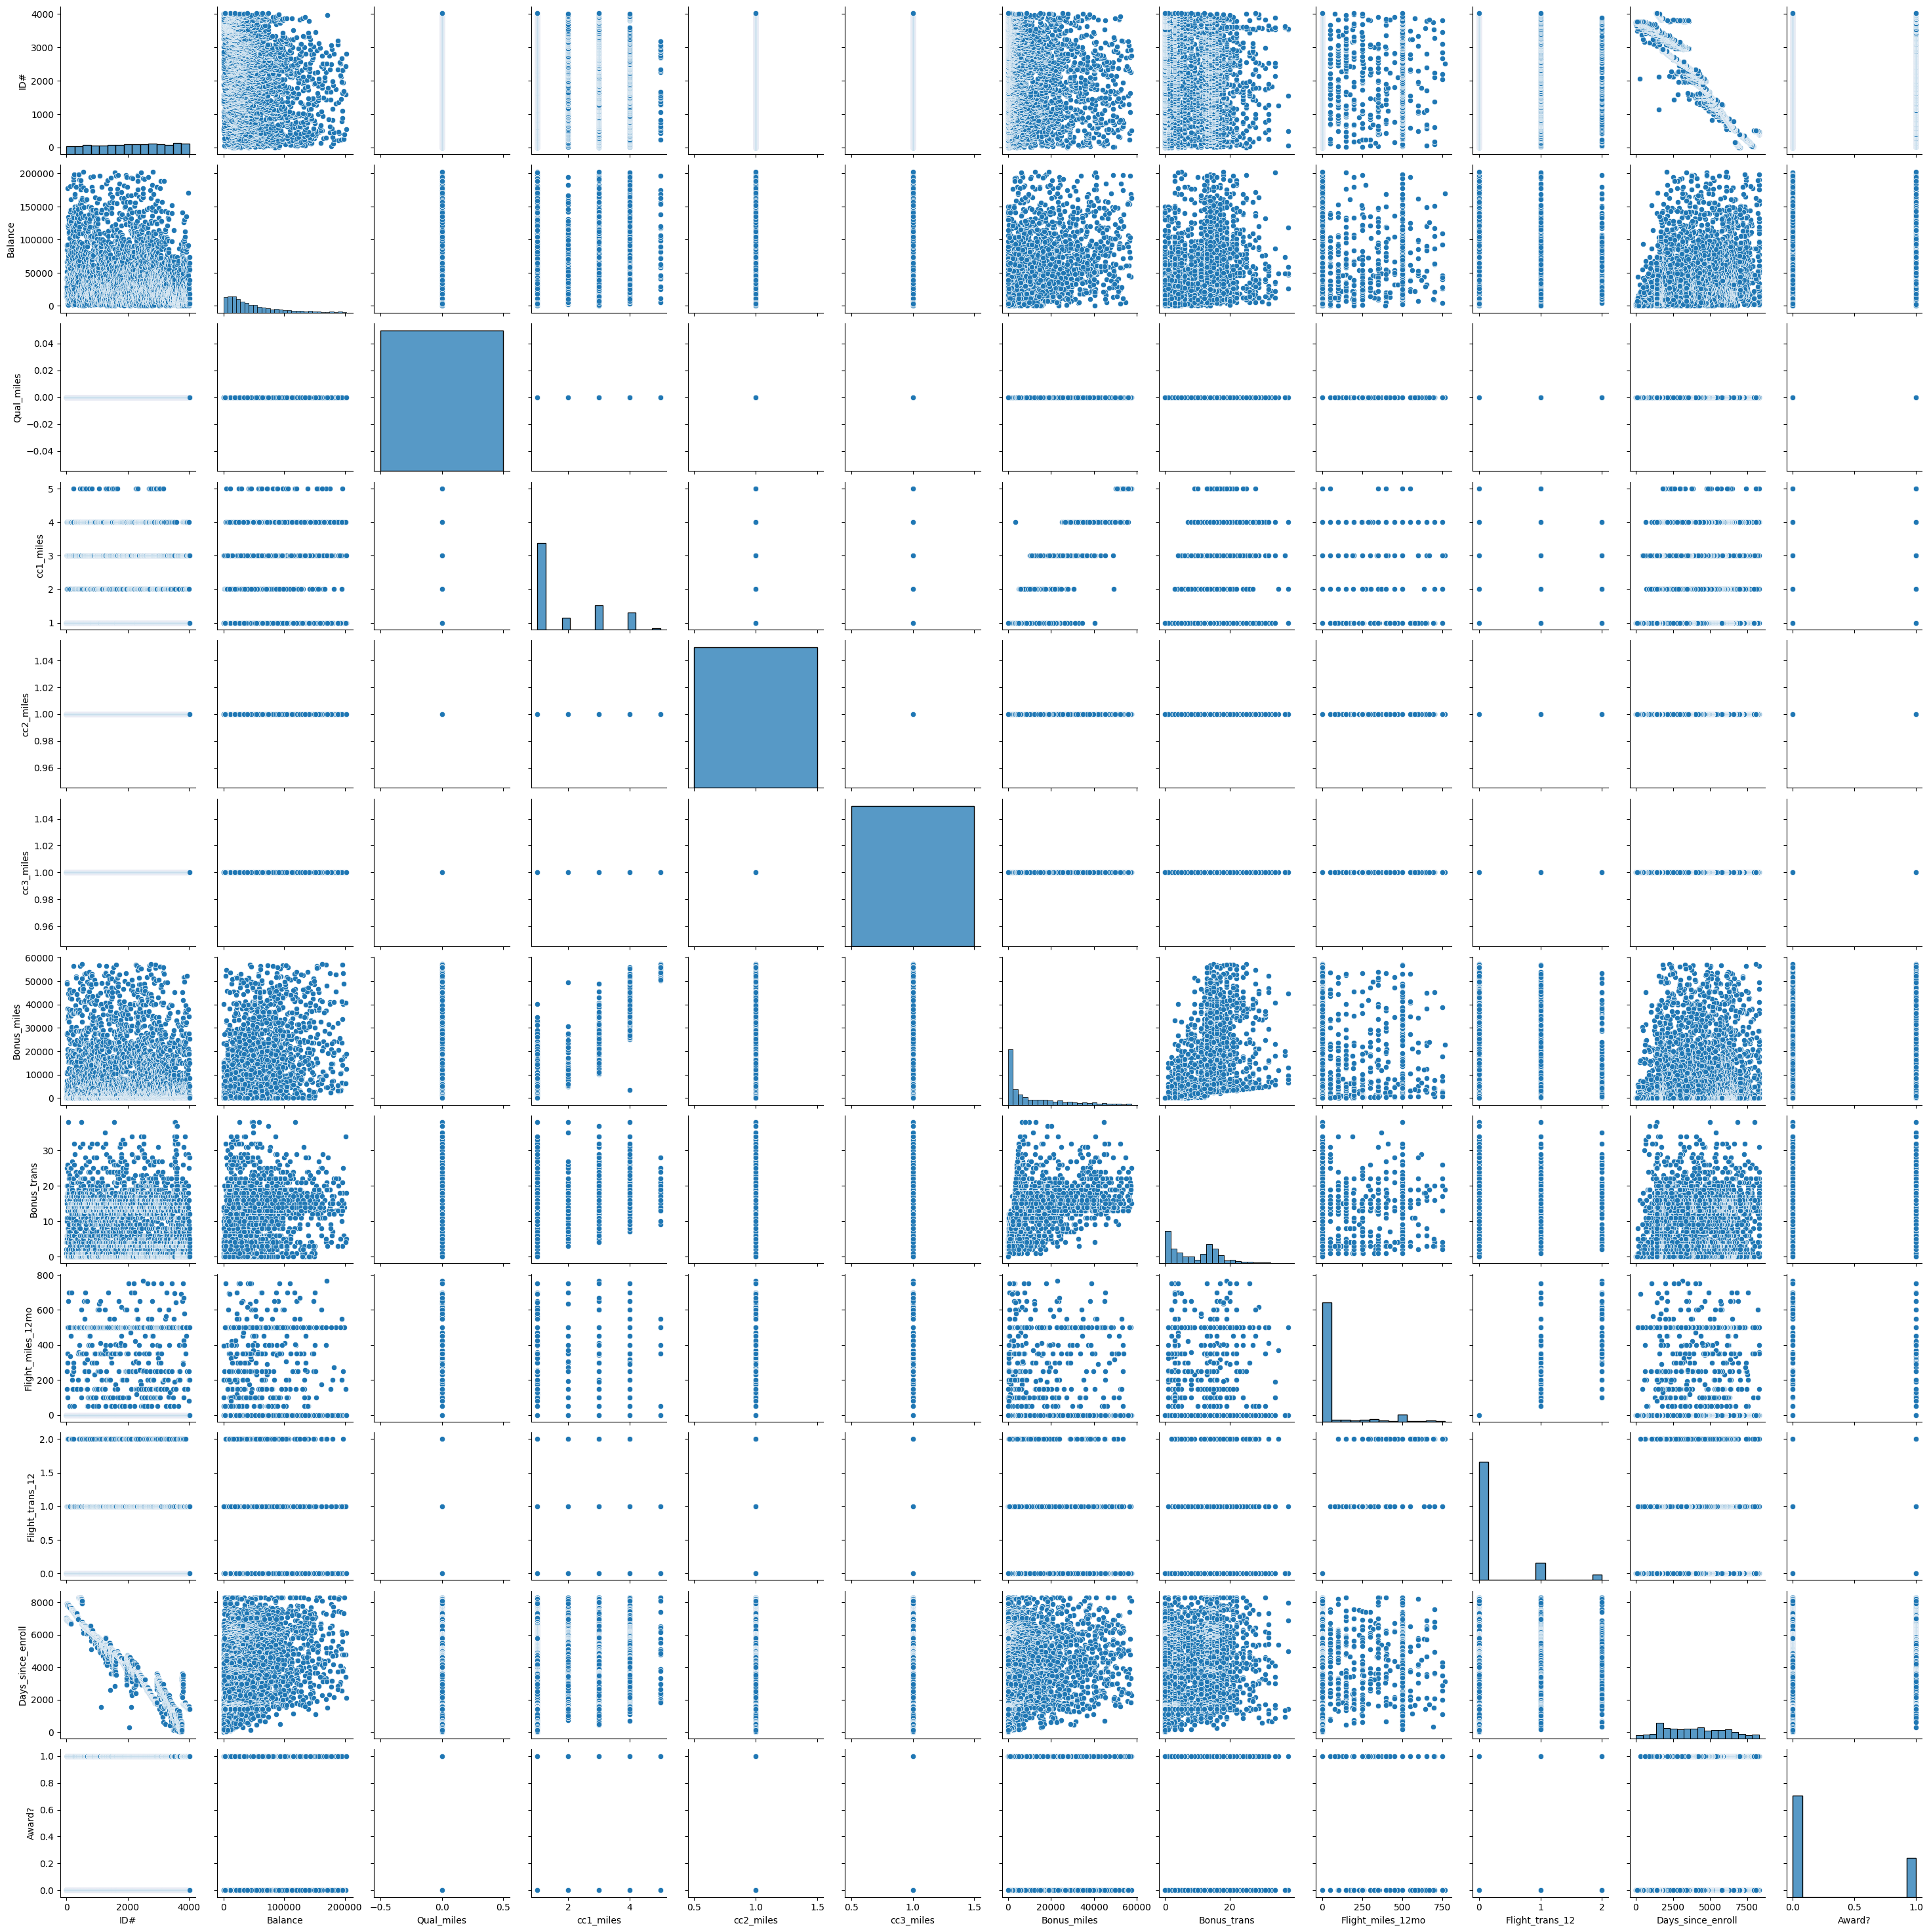

In [131]:
sns.pairplot(df)
plt.show()


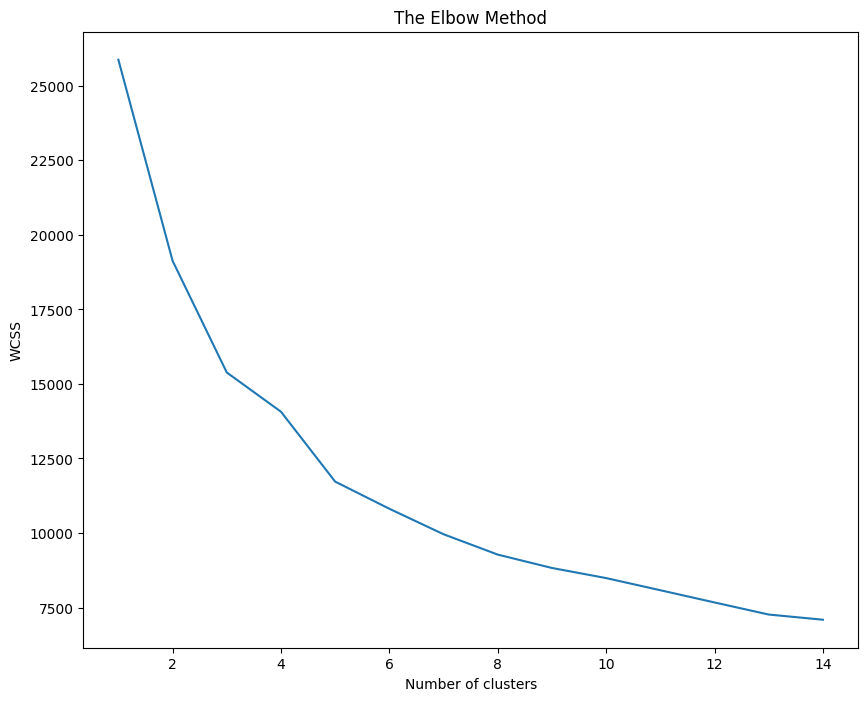

In [132]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

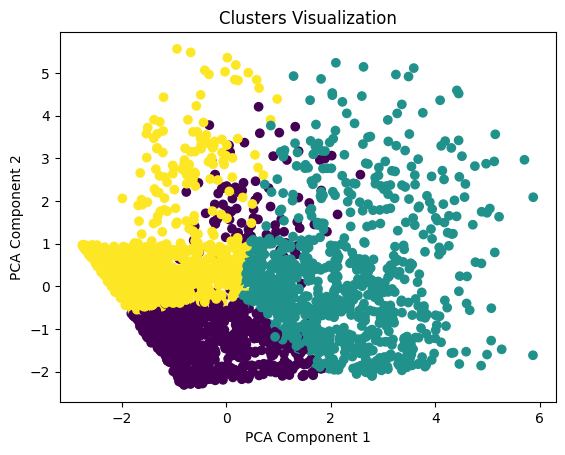

In [133]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3)  # Example: 3 clusters
clusters = kmeans.fit_predict(df_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Visualize clusters (if data is 2D or reduced to 2D)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters)
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [134]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.23006653958103435


# Implementing Clustering Algorithms:
### • Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as 
   ### Python with libraries like scikit-learn or MATLAB.
### • Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
### • Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), 
 ###    K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.


In [135]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3)  # Example: 3 clusters
clusters = kmeans.fit_predict(df_scaled)


In [136]:
clusters

array([0, 0, 0, ..., 2, 1, 1])

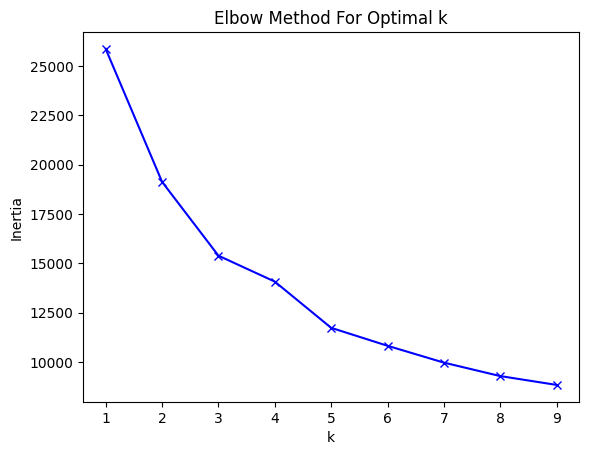

Silhouette Score for K-Means: 0.284


In [137]:
# 3. Implementing Clustering Algorithms

# 3.1 K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Elbow method to determine the optimal number of clusters
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans:.3f}')


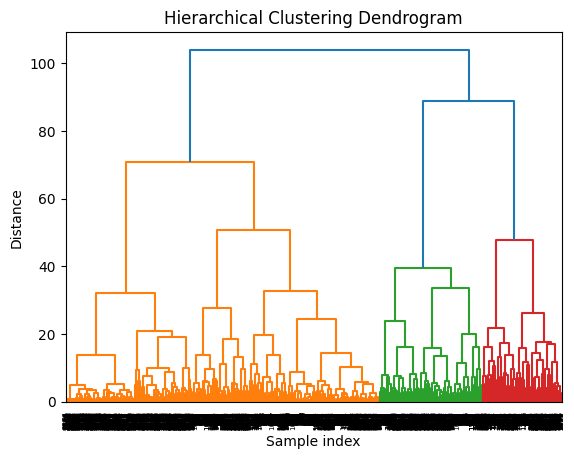

Silhouette Score for DBSCAN: -0.332


In [138]:
# 3.2 Hierarchical Clustering
linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram at a certain level to obtain clusters
hierarchical_labels = fcluster(linkage_matrix, t=4, criterion='maxclust')

# 3.3 DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Silhouette Score for DBSCAN
silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels)
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan:.3f}')

# Cluster Analysis and Interpretation:
### •	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster.
 ###   Write you insights in few comments.


In [146]:
# 4. Cluster Analysis and Interpretation
df['KMeans_Labels'] = kmeans_labels
df['Hierarchical_Labels'] = hierarchical_labels
df['DBSCAN_Labels'] = dbscan_labels

In [147]:
"""Final Comments:

   K-Means works best when clusters are well-separated and spherical in shape.
   Hierarchical clustering is useful for exploring hierarchical relationships but may struggle with large datasets.
   DBSCAN is effective for detecting outliers and clusters of varying shapes and sizes. """

'Final Comments:\n\n   K-Means works best when clusters are well-separated and spherical in shape.\n   Hierarchical clustering is useful for exploring hierarchical relationships but may struggle with large datasets.\n   DBSCAN is effective for detecting outliers and clusters of varying shapes and sizes. '

# Visualization:
### Visualize the clustering results using scatter plots or other suitable visualization techniques.
### Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


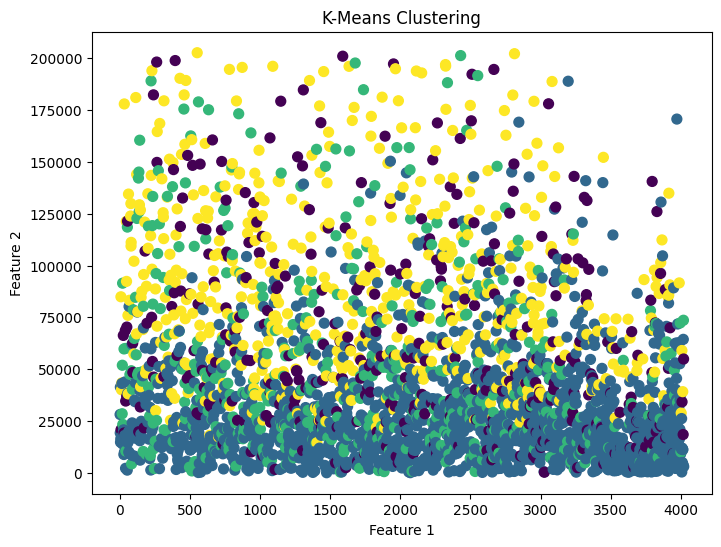

In [148]:
# Visualizing clusters based on K-Means results
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


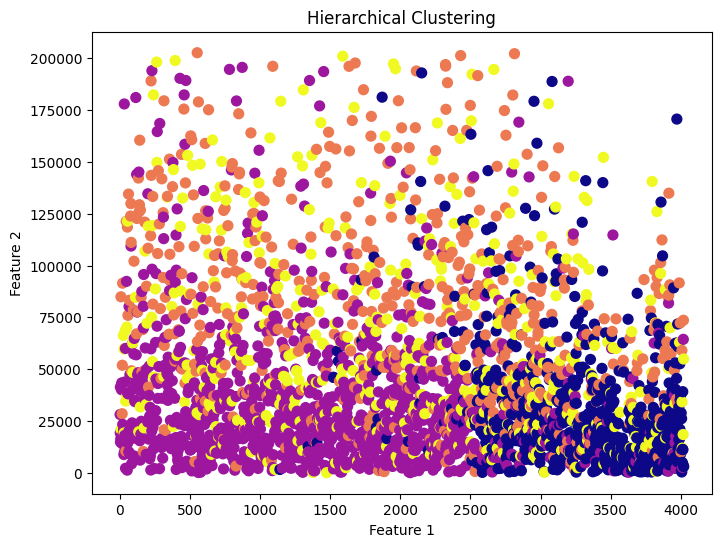

In [150]:
# Visualizing clusters based on Hierarchical Clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=hierarchical_labels, cmap='plasma', s=50)
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


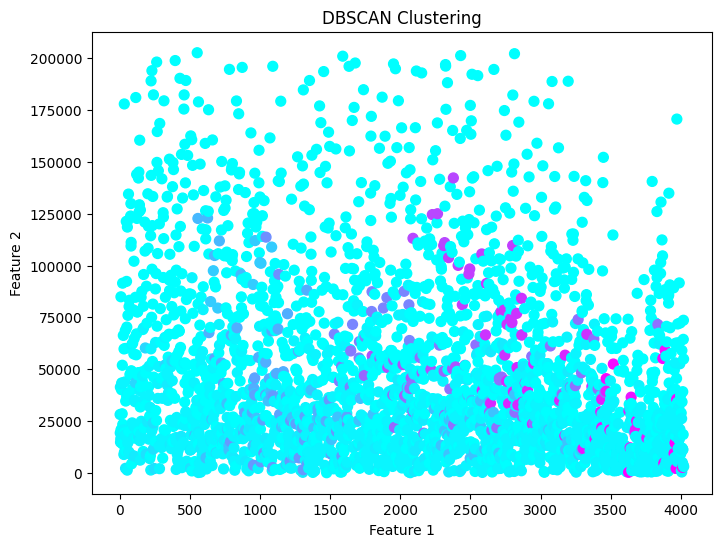

In [151]:
# Visualizing clusters based on DBSCAN results
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dbscan_labels, cmap='cool', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Evaluation and Performance Metrics:
### Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [152]:
# 6. Evaluation and Performance Metrics
print(f'Silhouette Score for K-Means: {silhouette_kmeans:.3f}')
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan:.3f}')

Silhouette Score for K-Means: 0.284
Silhouette Score for DBSCAN: -0.332
